<a href="https://colab.research.google.com/github/OlegKret/---/blob/master/Lab2_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task. Build according to your number in group list:
1.	Visualize the scalar field. Find its gradient and visualize it as a flat vector field;
2.	Visualize a plane vector field both with the help of vectors and current lines from the matplotlib library and with the code from the listing;
3.	Construct a three-dimensional visualization of the vector field; For an additional point (optional), modernize the algorithm for constructing current lines in the case of a 3-dimensional field.
4.	Construct a visualization of a tensor field using ellipsoids, cuboids, cylinders, and any superquadrant.


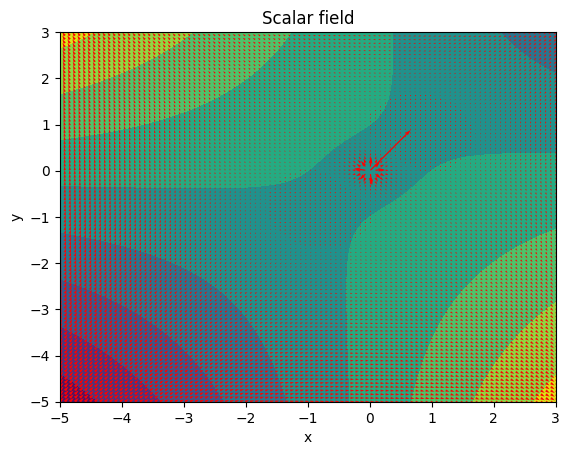

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the scalar field
def u(x, y):
    return 4 * np.log(x**2 + y**2) - 8 * x * y

# Create a grid of points
x = np.linspace(-5, 3, 100)
y = np.linspace(-5, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate the gradient of the scalar field, using the 2D arrays
u_x = 8 * X / (X**2 + Y**2) - 8 * Y
u_y = 8 * Y / (X**2 + Y**2) - 8 * X

# Plot the scalar field
fig, ax = plt.subplots()
ax.contourf(X, Y, u(X, Y), cmap='viridis')
ax.set_title('Scalar field')

# Plot the gradient as a flat vector field (using the 2D gradient components)
ax.quiver(X, Y, u_x, u_y, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

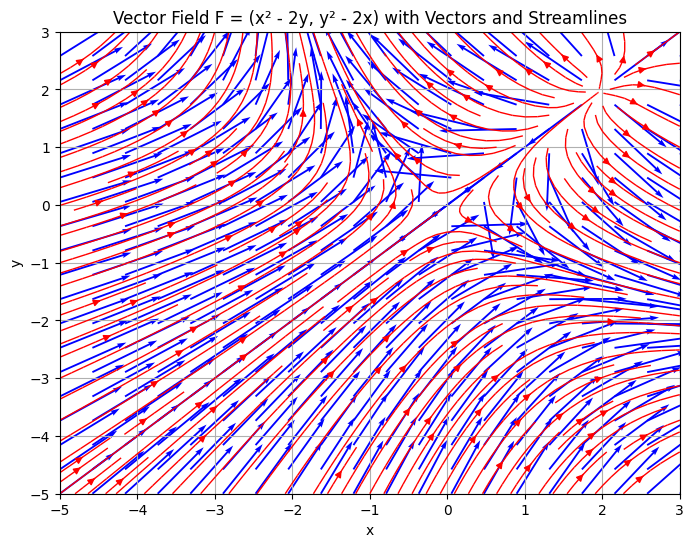

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vector field components
def F(x, y):
    u = x**2 - 2*y
    v = y**2 - 2*x
    return u, v

# Create a grid of points within the specified range
x = np.linspace(-5, 3, 20)
y = np.linspace(-5, 3, 20)
X, Y = np.meshgrid(x, y)

# Calculate vector components at each point
U, V = F(X, Y)

# Normalize vectors for consistent arrow lengths
N = np.sqrt(U**2 + V**2)
U = U / N
V = V / N

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the vector field (arrows)
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='blue')

# Plot streamlines
plt.streamplot(X, Y, U, V, density=1.5, color='red', linewidth=1)

# Set plot limits and labels
plt.xlim(-5, 3)
plt.ylim(-5, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Field F = (x² - 2y, y² - 2x) with Vectors and Streamlines')
plt.grid(True)

# Show the plot
plt.show()

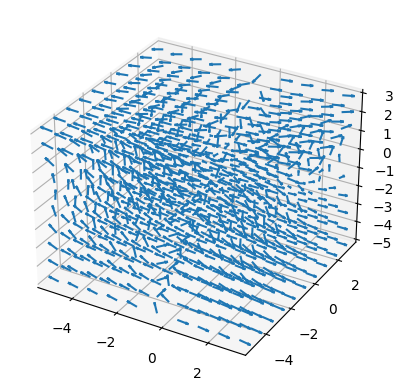

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the grid
x, y, z = np.meshgrid(np.linspace(-5, 3, 10), np.linspace(-5, 3, 10), np.linspace(-5, 3, 10))

# Calculate the vectors
u = y/z + 2*x
v = x/z
w = x*y/z**2

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw the vectors
ax.quiver(x, y, z, u, v, w, length=0.5, normalize=True)

plt.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.spatial import Delaunay

# Define the tensor field (replace with your actual data or formula)
x, y, z = np.mgrid[1:10:20j, 1:10:20j, 1:10:20j]
Tx = x * (np.log(x*y) - np.log(x*z))   # Based on the matrix in the image
Ty = -y
Tz = z

# Normalize the tensor field for scaling the shapes
magnitude = np.sqrt(Tx**2 + Ty**2 + Tz**2)
Tx_norm, Ty_norm, Tz_norm = Tx / magnitude, Ty / magnitude, Tz / magnitude

# Function to generate mesh vertices and faces for a cube
def cube_mesh(center, size=0.2):
    half_size = size / 2
    x = [center[0] - half_size, center[0] + half_size]
    y = [center[1] - half_size, center[1] + half_size]
    z = [center[2] - half_size, center[2] + half_size]

    vertices = np.array([
        [x[0], y[0], z[0]], [x[1], y[0], z[0]], [x[1], y[1], z[0]], [x[0], y[1], z[0]],  # Bottom face
        [x[0], y[0], z[1]], [x[1], y[0], z[1]], [x[1], y[1], z[1]], [x[0], y[1], z[1]]   # Top face
    ])

    triangles = np.array([
        [0, 1, 2], [0, 2, 3],  # Bottom
        [4, 5, 6], [4, 6, 7],  # Top
        [0, 1, 5], [0, 5, 4],  # Front
        [1, 2, 6], [1, 6, 5],  # Right
        [2, 3, 7], [2, 7, 6],  # Back
        [3, 0, 4], [3, 4, 7]   # Left
    ])
    return vertices, triangles

# Function to generate mesh vertices and faces for an ellipsoid
def ellipsoid_mesh(center, radii, resolution=20, jitter=1e-6):  # Add jitter
    u, v = np.mgrid[0:2*np.pi:resolution*1j, -np.pi/2:np.pi/2:resolution*1j]
    x = center[0] + radii[0] * np.cos(u) * np.cos(v) + jitter * np.random.rand(*u.shape)  # Jitter
    y = center[1] + radii[1] * np.sin(u) * np.cos(v) + jitter * np.random.rand(*u.shape)
    z = center[2] + radii[2] * np.sin(v) + jitter * np.random.rand(*u.shape)
    points = np.vstack([x.flatten(), y.flatten(), z.flatten()]).T
    triangles = Delaunay(points).simplices
    return points, triangles

# Function to generate mesh vertices and faces for a cylinder
def cylinder_mesh(center, radius, height, resolution=20):
    theta = np.linspace(0, 2*np.pi, resolution)
    z = np.linspace(-height/2, height/2, 2)
    theta, Z = np.meshgrid(theta, z)
    X = radius * np.cos(theta) + center[0]
    Y = radius * np.sin(theta) + center[1]

    # Vertices
    vertices = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])

    # Triangles for the curved surface
    triangles1 = []
    for i in range(resolution-1):
        for j in range(1):
            triangles1.append([i + j*resolution, i+1 + j*resolution, i+1 + (j+1)*resolution])
            triangles1.append([i + j*resolution, i+1 + (j+1)*resolution, i + (j+1)*resolution])

    # Triangles for the top and bottom faces
    triangles2 = []
    for i in range(resolution-1):
        triangles2.append([i, i+1, resolution-1])
        triangles2.append([i+resolution, i+1+resolution, 2*resolution-1])

    triangles = np.vstack([triangles1, triangles2])
    return vertices, triangles


# Create the shapes for visualization
shapes = []
for i in range(len(x.flatten())):
    # Ellipsoid using Mesh3d
    center = [x.flatten()[i], y.flatten()[i], z.flatten()[i]]
    radii = [0.2 * abs(Tx_norm.flatten()[i]),
             0.2 * abs(Ty_norm.flatten()[i]),
             0.2 * abs(Tz_norm.flatten()[i])]
    points, triangles = ellipsoid_mesh(center, radii)
    shapes.append(go.Mesh3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], i=triangles[:, 0], j=triangles[:, 1], k=triangles[:, 2], opacity=0.5))

    # Cube using Mesh3d
    center = [x.flatten()[i], y.flatten()[i], z.flatten()[i]]
    points, triangles = cube_mesh(center)
    shapes.append(go.Mesh3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], i=triangles[:, 0], j=triangles[:, 1], k=triangles[:, 2], opacity=0.5))

    # Cylinder using Mesh3d
    center = [x.flatten()[i], y.flatten()[i], z.flatten()[i]]
    radius = 0.1
    height = 0.4 * abs(Tz_norm.flatten()[i])
    points, triangles = cylinder_mesh(center, radius, height)
    shapes.append(go.Mesh3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], i=triangles[:, 0], j=triangles[:, 1], k=triangles[:, 2], opacity=0.5))

# Example of a superquadric (Plotly doesn't have a direct superquadric object, but you can approximate it with a mesh)

# Create the figure and add the shapes
fig = go.Figure()
fig.add_traces(shapes)

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title='Tensor Field Visualization'
)

fig.show()